In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy.io import arff
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Cleaning (for Google Colab)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving speeddating.arff to speeddating.arff


In [ ]:
import warnings
warnings.filterwarnings("ignore")

data = arff.loadarff('speeddating.arff')
df1 = pd.DataFrame(data[0])
df1

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'0',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'0',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'1',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'0',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'0',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'1',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'1',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'1',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'1',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [ ]:
# #cleaning option 1 - convert NaN to mean value of the column

# df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

# for column in df.select_dtypes(include=['object']).columns:
#     df[column] = pd.Categorical(df[column]).codes

# df = df.apply(pd.to_numeric, errors='coerce')

# df.head()


In [ ]:
#cleaning option 2 - drop NaN values

df1 = df1.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

df1 = df1.dropna()

for column in df1.select_dtypes(include=['object']).columns:
    df1[column] = pd.Categorical(df1[column]).codes

df1 = df1.apply(pd.to_numeric, errors='coerce')

df1.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1.0,0,21.0,27.0,6.0,2,0,2,0,...,0,1,7.0,6.0,1,1,0.0,1,0,0
1,0,1.0,0,21.0,22.0,1.0,0,0,2,0,...,0,1,7.0,5.0,1,1,1.0,1,0,0
3,0,1.0,0,21.0,23.0,2.0,1,0,2,0,...,0,1,7.0,6.0,1,1,0.0,1,1,1
4,0,1.0,0,21.0,24.0,3.0,1,0,3,0,...,0,1,6.0,6.0,1,1,0.0,1,1,1
5,0,1.0,0,21.0,25.0,4.0,2,0,2,0,...,0,1,6.0,5.0,1,1,0.0,0,1,0


In [ ]:
descriptive_stats = df1.describe()
print(descriptive_stats)

       has_null         wave       gender          age        age_o  \
count    1048.0  1048.000000  1048.000000  1048.000000  1048.000000   
mean        0.0     2.958015     0.493321    25.005725    24.818702   
std         0.0     1.244722     0.500194     3.270365     3.180581   
min         0.0     1.000000     0.000000    18.000000    18.000000   
25%         0.0     2.000000     0.000000    22.000000    22.000000   
50%         0.0     3.000000     0.000000    25.000000    25.000000   
75%         0.0     4.000000     1.000000    27.000000    27.000000   
max         0.0     5.000000     1.000000    35.000000    35.000000   

             d_age      d_d_age         race       race_o     samerace  ...  \
count  1048.000000  1048.000000  1048.000000  1048.000000  1048.000000  ...   
mean      3.032443     1.125000     1.812023     1.771947     0.416985  ...   
std       2.427732     0.985388     1.089136     1.048260     0.493296  ...   
min       0.000000     0.000000     0.000000

In [ ]:
df1.to_excel('speeddating_cleaned.xlsx', index=False)  # `index=False` to avoid writing row indices in the file

from google.colab import files
files.download('speeddating_cleaned.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Upload Clean Dataset (for Google Colab)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving speeddating_cleaned.xlsx to speeddating_cleaned (1).xlsx


In [ ]:
df = pd.read_excel('speeddating_cleaned.xlsx')
#print(df)

## Upload Clean Dataset (for Jupyter Notebook)

In [ ]:
df = pd.read_excel('speeddating_cleaned.xlsx')
print(df.head()))

## Training ML Algorithm

### Basic Model


In [ ]:
exclude_column = 'match'

filtered_columns = [col for col in df.columns if col != exclude_column]

features = filtered_columns

In [ ]:
y = df['match'].copy()
X = df[features].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)


In [ ]:
clf = RandomForestClassifier(random_state = 1000)
clf.fit(X_train, y_train)

#predictions on the testing set
y_hat = clf.predict(X_test)

### Look at age

In [ ]:
def compute_metrics(y_hat,
                    y_test,
                    X_test):

    test_age = X_test.copy()
    test_age['outcome'] = y_test
    test_age['predicted'] = y_hat

    TP_0_age = ((test_age['predicted'] == 1) & (test_age['outcome'] == 1) & (df['age_o'] <= 25)).sum()
    FP_0_age = ((test_age['predicted'] == 1) & (test_age['outcome'] == 0) & (df['age_o'] <= 25)).sum()
    TN_0_age = ((test_age['predicted'] == 0) & (test_age['outcome'] == 0) & (df['age_o'] <= 25)).sum()
    FN_0_age = ((test_age['predicted'] == 0) & (test_age['outcome'] == 1) & (df['age_o'] <= 25)).sum()

    TP_1_age = ((test_age['predicted'] == 1) & (test_age['outcome'] == 1) & (df['age_o'] > 25)).sum()
    FP_1_age = ((test_age['predicted'] == 1) & (test_age['outcome'] == 0) & (df['age_o'] > 25)).sum()
    TN_1_age = ((test_age['predicted'] == 0) & (test_age['outcome'] == 0) & (df['age_o'] > 25)).sum()
    FN_1_age = ((test_age['predicted'] == 0) & (test_age['outcome'] == 1) & (df['age_o'] > 25)).sum()

    # Printing out the count of False Positives and True Negatives
    print("False Positives (age <= 25):", FP_0_age)
    print("True Negatives (age <= 25):", TN_0_age)
    print("False Positives (age > 25):", FP_1_age)
    print("True Negatives (age > 25):", TN_1_age)


    # Calculate measures for g0
    accuracy_g0_age = (TP_0_age + TN_0_age) / (TP_0_age + TN_0_age + FP_0_age + FN_0_age)
    precision_g0_age = TP_0_age / (TP_0_age + FP_0_age) if TP_0_age + FP_0_age > 0 else 0
    recall_g0_age = TP_0_age / (TP_0_age + FN_0_age) if TP_0_age + FN_0_age > 0 else 0
    false_positive_rate_g0_age = FP_0_age / (FP_0_age + TN_0_age) if FP_0_age + TN_0_age > 0 else 0

    # Calculate measures for g1
    accuracy_g1_age = (TP_1_age + TN_1_age) / (TP_1_age + TN_1_age + FP_1_age + FN_1_age)
    precision_g1_age = TP_1_age / (TP_1_age + FP_1_age) if TP_1_age + FP_1_age > 0 else 0
    recall_g1_age = TP_1_age / (TP_1_age + FN_1_age) if TP_1_age + FN_1_age > 0 else 0
    false_positive_rate_g1_age = FP_1_age / (FP_1_age + TN_1_age) if FP_1_age + TN_1_age > 0 else 0


    metrics_df_age = pd.DataFrame({
    "Group": ["Less or equal to 25", "Less or equal to 25", "Less or equal to 25", "Less or equal to 25",
              "Greater than 25", "Greater than 25", "Greater than 25", "Greater than 25"],
    "Metric": ["Accuracy", "Precision", "Recall", "FPR", "Accuracy", "Precision", "Recall", "FPR"],
    "Value": [accuracy_g0_age, precision_g0_age, recall_g0_age, false_positive_rate_g0_age,
              accuracy_g1_age, precision_g1_age, recall_g1_age, false_positive_rate_g1_age]})

    return metrics_df_age


In [ ]:
print("Calling compute_metrics now...")
metrics_df_age = compute_metrics(y_hat=y_hat, y_test=y_test, X_test=X_test)
 #LOL something is def wrong ..... :(

Calling compute_metrics now...
False Positives (age <= 25): 0
True Negatives (age <= 25): 103
False Positives (age > 25): 0
True Negatives (age > 25): 69


In [ ]:
metrics_df_age = compute_metrics(y_hat = y_hat, y_test = y_test, X_test = X_test)

print(metrics_df_age.pivot(index='Metric', columns='Group', values='Value'))

#something is fishy here.....

False Positives (age <= 25): 0
True Negatives (age <= 25): 103
False Positives (age > 25): 0
True Negatives (age > 25): 69
Group      Greater than 25  Less or equal to 25
Metric                                         
Accuracy          0.950617             0.961240
FPR               0.000000             0.000000
Precision         1.000000             1.000000
Recall            0.666667             0.807692


In [ ]:
# Feature importance
importances = clf.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print("Feature importances:")
for feature, importance in zip(feature_importances.index, feature_importances.values):
    print(f"{feature}: {importance}")

Feature importances:
decision_o: 0.16796212791744708
decision: 0.16050123774589004
like: 0.03530256879245601
attractive_partner: 0.03216585378655163
attractive_o: 0.02746439920314835
funny_o: 0.024729368251001763
shared_interests_o: 0.01879993168676521
funny_partner: 0.018524706989146284
guess_prob_liked: 0.017447223603550353
d_attractive_o: 0.01732033606583802
d_shared_interests_o: 0.01617785990307339
shared_interests_partner: 0.015520823961140084
d_like: 0.014536407843135576
interests_correlate: 0.014099366576225075
expected_num_matches: 0.011007155776399718
pref_o_shared_interests: 0.010497922895223753
pref_o_intelligence: 0.008888373802608197
importance_same_race: 0.00846495446980185
age_o: 0.008363664916655788
sinsere_o: 0.008252603105305099
d_funny_o: 0.007897754458654887
pref_o_funny: 0.007705486802307333
pref_o_sincere: 0.007315985932608112
d_funny_partner: 0.007181135588045525
ambitous_o: 0.006849444302418354
gaming: 0.0068284571614835145
field: 0.006737775209202177
pref_o_amb

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.94642857 0.95833333 0.94047619 0.9760479  0.96407186]
Mean cross-validation score: 0.9570715711434274


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


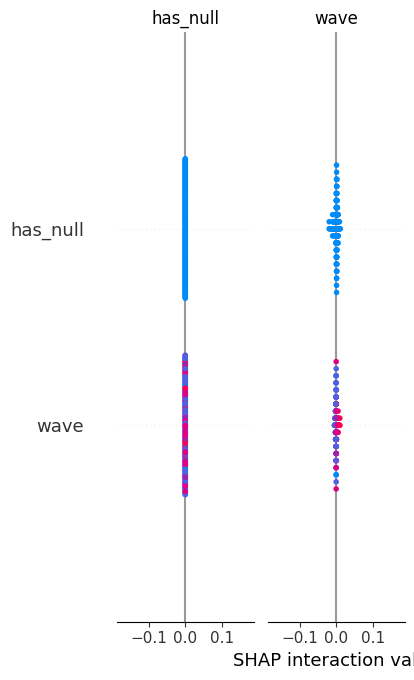

In [ ]:
!pip install shap
import shap


explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
metrics_df_gender = compute_metrics(y_hat=y_hat, y_test=y_test, X_test=X_test)
print(metrics_df_gender.pivot(index='Metric', columns='Group', values='Value'))

False Positives (age <= 25): 0
True Negatives (age <= 25): 103
False Positives (age > 25): 0
True Negatives (age > 25): 69
Group      Greater than 25  Less or equal to 25
Metric                                         
Accuracy          0.950617             0.961240
FPR               0.000000             0.000000
Precision         1.000000             1.000000
Recall            0.666667             0.807692


In [ ]:
age_max = df['age_o'].max()
age_min = df['age_o'].min()
age_avg = int(df['age_o'].mean())
age_med = int(df['age_o'].median())

print("The minimum age of participants is", age_min, "and the maximum age is", age_max)
print("The average age of participants is", age_avg)
print("The median age of participants is", age_med)

The minimum age of participants is 18 and the maximum age is 35
The average age of participants is 24
The median age of participants is 25


In [ ]:
#Actual % breakdown
df_younger = round(sum(df['age_o'] <= 25)/len(df), 2)
df_older = round(sum(df['age_o'] > 25)/len(df), 2)

print("% younger than or equal to 25 in train: ", df_younger)
print("% older than 25 in train: ", df_older)

% younger than or equal to 25 in train:  0.61
% older than 25 in train:  0.39


In [ ]:
#Training % breakdown
train_younger = round(sum(X_train['age_o'] <= 25)/len(X_train), 2)
train_older = round(sum(X_train['age_o'] > 25)/len(X_train), 2)

print("% younger than or equal to 25 in train: ", train_younger)
print("% older than 25 in train: ", train_older)

% younger than or equal to 25 in train:  0.61
% older than 25 in train:  0.39


In [ ]:
#Testing % breakdown
test_younger = round(sum(X_test['age_o'] <= 25)/len(X_test), 2)
test_older = round(sum(X_test['age_o'] > 25)/len(X_test), 2)

print("% younger than or equal to 25 in test: ", test_younger)
print("% older than 25 in test: ", test_older)

% younger than or equal to 25 in test:  0.61
% older than 25 in test:  0.39


### Look at gender

In [ ]:
def compute_metrics(y_hat,
                    y_test,
                    X_test):

    test_gender = X_test.copy()
    test_gender['outcome'] = y_test
    test_gender['predicted'] = y_hat

    TP_0_gender = ((test_gender['predicted'] == 1) & (test_gender['outcome'] == 1) & (df['gender'] == 0)).sum()
    FP_0_gender = ((test_gender['predicted'] == 1) & (test_gender['outcome'] == 0) & (df['gender'] == 0)).sum()
    TN_0_gender = ((test_gender['predicted'] == 0) & (test_gender['outcome'] == 0) & (df['gender'] == 0)).sum()
    FN_0_gender = ((test_gender['predicted'] == 0) & (test_gender['outcome'] == 1) & (df['gender'] == 0)).sum()

    TP_1_gender = ((test_gender['predicted'] == 1) & (test_gender['outcome'] == 1) & (df['gender'] == 1)).sum()
    FP_1_gender = ((test_gender['predicted'] == 1) & (test_gender['outcome'] == 0) & (df['gender'] == 1)).sum()
    TN_1_gender = ((test_gender['predicted'] == 0) & (test_gender['outcome'] == 0) & (df['gender'] == 1)).sum()
    FN_1_gender = ((test_gender['predicted'] == 0) & (test_gender['outcome'] == 1) & (df['gender'] == 1)).sum()

    # Calculate measures for g0
    accuracy_g0_gender = (TP_0_gender + TN_0_gender) / (TP_0_gender + TN_0_gender + FP_0_gender + FN_0_gender)
    precision_g0_gender = TP_0_gender / (TP_0_gender + FP_0_gender) if TP_0_gender + FP_0_gender > 0 else 0
    recall_g0_gender = TP_0_gender / (TP_0_gender + FN_0_gender) if TP_0_gender + FN_0_gender > 0 else 0
    false_positive_rate_g0_gender = FP_0_gender / (FP_0_gender + TN_0_gender) if FP_0_gender + TN_0_gender > 0 else 0

    # Calculate measures for g1
    accuracy_g1_gender = (TP_1_gender + TN_1_gender) / (TP_1_gender + TN_1_gender + FP_1_gender + FN_1_gender)
    precision_g1_gender = TP_1_gender / (TP_1_gender + FP_1_gender) if TP_1_gender + FP_1_gender > 0 else 0
    recall_g1_gender = TP_1_gender / (TP_1_gender + FN_1_gender) if TP_1_gender + FN_1_gender > 0 else 0
    false_positive_rate_g1_gender = FP_1_gender / (FP_1_gender + TN_1_gender) if FP_1_gender + TN_1_gender > 0 else 0


    metrics_df_gender = pd.DataFrame({
    "Group": ["W", "W", "W", "W",
              "M", "M", "M", "M"],
    "Metric": ["Accuracy", "Precision", "Recall", "FPR", "Accuracy", "Precision", "Recall", "FPR"],
    "Value": [accuracy_g0_gender, precision_g0_gender, recall_g0_gender, false_positive_rate_g0_gender,
              accuracy_g1_gender, precision_g1_gender, recall_g1_gender, false_positive_rate_g1_gender]})

    return metrics_df_gender


In [ ]:
metrics_df_gender = compute_metrics(y_hat = y_hat, y_test = y_test, X_test = X_test)

print(metrics_df_gender.pivot(index='Metric', columns='Group', values='Value'))

#something is fishy here.....

Group             M         W
Metric                       
Accuracy   0.934579  0.980583
FPR        0.000000  0.000000
Precision  1.000000  1.000000
Recall     0.650000  0.888889


In [ ]:
w = df['gender']==0
m = df['gender']==1

w_sum = w.sum()
m_sum = m.sum()

print("There are", w_sum, "women and", m_sum, "men")

There are 531 women and 517 men


In [ ]:
#Actual % breakdown

w_p = round(w_sum/len(df),2)
m_p = round(m_sum/len(df),2)

print("% women in data:", w_p)
print("% men in data:", m_p)

% women in data: 0.51
% men in data: 0.49


In [ ]:
#Training % breakdown

w_train = round(sum(X_train['gender']==0)/len(X_train),2)
m_train = round(sum(X_train['gender']==1)/len(X_train),2)

print("% women in training:", w_train)
print("% men in training: ", m_train)

% women in training: 0.51
% men in training:  0.49


In [ ]:
#Testing % breakdown

w_test = round(sum(X_test['gender']==0)/len(X_test),2)
m_test = round(sum(X_test['gender']==1)/len(X_test),2)

print("% women in testing:", w_test)
print("% men in testing: ", m_test)



% women in testing: 0.49
% men in testing:  0.51


### Look at Race

In [ ]:
# Race numbers
# 0 = Asian/Pacific Islander/Asian-American
# 1 =
# 2 = European/Caucasian-American
# 3 = Latino/Hispanic-American


## Reweighting to Correct Sample

#### Age

In [ ]:
X_train['partner_age'] = np.where(X_train['age_o'] <= 25, 0, 1)

In [ ]:
X_test['partner_age'] = np.where(X_test['age_o'] <= 25, 0, 1)

In [ ]:
group_counts = X_train['partner_age'].value_counts()
most_represented_group_count = group_counts.max()
group_counts

partner_age
0    508
1    330
Name: count, dtype: int64

In [ ]:
X_train['weights'] = X_train['partner_age'].apply(lambda x: most_represented_group_count / group_counts[x])

In [ ]:
# Calculate group counts for 'partner_age'
group_counts = X_train['partner_age'].value_counts()
print("Group counts for 'partner_age':")
print(group_counts)

# Calculate the most represented group count
most_represented_group_count = group_counts.max()

# Applying the calculated weights
X_train['weights'] = X_train['partner_age'].apply(lambda x: most_represented_group_count / group_counts[x])
print("Weights added to X_train:")
print(X_train[['partner_age', 'weights']].head())


Group counts for 'partner_age':
partner_age
0    508
1    330
Name: count, dtype: int64
Weights added to X_train:
     partner_age   weights
10             0  1.000000
709            1  1.539394
148            0  1.000000
381            0  1.000000
268            0  1.000000


In [ ]:
weighted_sum = X_train.groupby('partner_age').agg(
    total_weight=pd.NamedAgg(column='weights', aggfunc='sum'),
)

print(weighted_sum)

             total_weight
partner_age              
0                   508.0
1                   508.0


In [ ]:
weights = X_train['weights']
X_train.drop(['weights'],axis=1,inplace=True)


clf_preprocess = RandomForestClassifier(random_state = 1000)
clf_preprocess.fit(X_train, y_train, sample_weight=weights)

#predictions on the testing set
y_hat_preprocess = clf_preprocess.predict(X_test)

metrics_df_age = compute_metrics(y_hat = y_hat_preprocess, y_test = y_test, X_test = X_test)

print(metrics_df_age.pivot(index='Metric', columns='Group', values='Value'))



Group             M         W
Metric                       
Accuracy   0.943925  0.970874
FPR        0.000000  0.000000
Precision  1.000000  1.000000
Recall     0.700000  0.833333


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = lr_model.predict(X_test)

# Evaluate fairness metrics for logistic regression
metrics_df_lr = compute_metrics(y_hat=y_pred_lr, y_test=y_test, X_test=X_test)
print("Fairness Metrics - Logistic Regression:")
print(metrics_df_lr.pivot(index='Metric', columns='Group', values='Value'))

Fairness Metrics - Logistic Regression:
Group             M         W
Metric                       
Accuracy   0.971963  0.990291
FPR        0.011494  0.000000
Precision  0.947368  1.000000
Recall     0.900000  0.944444


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Create the 'age_group' column based on 'age_o'
X_train['age_group'] = np.where(X_train['age_o'] <= 25, 0, 1)
X_test['age_group'] = np.where(X_test['age_o'] <= 25, 0, 1)

# Assuming 'age_group' is a binary sensitive attribute (0 or 1)
sensitive_attr = 'age_group'

# Calculate weights based on the sensitive attribute
weights = len(X_train) / (2 * X_train[sensitive_attr].value_counts())
weights = weights.loc[X_train[sensitive_attr]].values

# Train the model with reweighting
clf_reweighted = RandomForestClassifier(random_state=42)
clf_reweighted.fit(X_train, y_train, sample_weight=weights)

# Make predictions on the testing set
y_pred_reweighted = clf_reweighted.predict(X_test)

# Evaluate fairness metrics after reweighting
metrics_df_reweighted = compute_metrics(y_hat=y_pred_reweighted, y_test=y_test, X_test=X_test)
print("Fairness Metrics - Reweighted Model:")
print(metrics_df_reweighted.pivot(index='Metric', columns='Group', values='Value'))

Fairness Metrics - Reweighted Model:
Group             M         W
Metric                       
Accuracy   0.934579  0.980583
FPR        0.000000  0.000000
Precision  1.000000  1.000000
Recall     0.650000  0.888889


In [ ]:
def compute_metrics_intersectional(y_hat, y_test, X_test):
    test_data = X_test.copy()
    test_data['outcome'] = y_test
    test_data['predicted'] = y_hat

    # Define the intersectional groups
    intersectional_groups = test_data.groupby(['gender', 'age_group'])

    metrics_dfs = []

    for group, data in intersectional_groups:
        gender, age_group = group
        group_name = f"Gender: {gender}, Age Group: {age_group}"

        TP = ((data['predicted'] == 1) & (data['outcome'] == 1)).sum()
        FP = ((data['predicted'] == 1) & (data['outcome'] == 0)).sum()
        TN = ((data['predicted'] == 0) & (data['outcome'] == 0)).sum()
        FN = ((data['predicted'] == 0) & (data['outcome'] == 1)).sum()

        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        false_positive_rate = FP / (FP + TN) if FP + TN > 0 else 0

        metrics_df = pd.DataFrame({
            "Group": [group_name],
            "Accuracy": [accuracy],
            "Precision": [precision],
            "Recall": [recall],
            "FPR": [false_positive_rate]
        })

        metrics_dfs.append(metrics_df)

    metrics_df_intersectional = pd.concat(metrics_dfs, ignore_index=True)
    return metrics_df_intersectional

# Evaluate fairness metrics with intersectional analysis
metrics_df_intersectional = compute_metrics_intersectional(y_hat=y_hat, y_test=y_test, X_test=X_test)
print("Fairness Metrics - Intersectional Analysis:")
print(metrics_df_intersectional)

Fairness Metrics - Intersectional Analysis:
                     Group  Accuracy  Precision    Recall  FPR
0  Gender: 0, Age Group: 0  0.983051        1.0  0.909091  0.0
1  Gender: 0, Age Group: 1  0.977273        1.0  0.857143  0.0
2  Gender: 1, Age Group: 0  0.942857        1.0  0.733333  0.0
3  Gender: 1, Age Group: 1  0.918919        1.0  0.400000  0.0


## Explanation of Tool Usage
### *What type of data is being used?*
The data being used is survey data from participants in a "speed dating" event where participants had 4-minute meetings with participants of the opposite sex. Demographic data was collected about each participant, including information like gender, age, and race. Preference and self-perception data was also collected, like their own interests and perception of own attractiveness. Participants were asked to indicate if they would like to see their date partner again (Yes or No) and rate their date partners on six attributes: Ambition, Attractiveness, Fun, Intelligence, Sincerity, and Shared Interests.

### *What is the target?*
The target variable is 'match'. Match is a binary variable that measures whether both participants indicated a desire to see their random date again, with Yes = 1 and No = 0. If only one participant indicates Yes, or if neither participant indicates Yes, the match variable is 0. If both participants indicate Yes, the match variable is 1.

### *How is the data integrated into sociotechnical systems?*
This data seeks to optimize social experiences based on trends in dating patterns from participation in this study. If valid, the insights gleaned from this study could improve dating outcomes by informing algorithms. This could be useful for online dating platforms like Hinge and Bumble to improve user satisfaction and maximize successful relationships, based on limited data.

### *Have the sociotechnical systems been deployed?*
Online dating platforms use a similar data-driven approach to matching users. They usually require additional and on-going input from the user in addition to relying on existing data. For example, many dating platforms require users to indicate their interest in other users by "swiping" or messaging the other user.